# Cousera - Audio Signal Processing - Week 2

[Link to week 2 videos](https://class.coursera.org/audio-001/wiki/week2)


In [1]:
#from __future__ import print_function
#from IPython.html.widgets import interact, interactive, fixed
#from IPython.html import widgets
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## DFT Part 1

The Fourier Transform effectively projects input signal of length N into K basis sinusoids.

IE you have an input signal of N=8 samples:

$$(1,2,3,4,5,6,7,8)$$

The for each **basis sinusoid** $k: 0 \rightarrow 7$ where the sinusoid is $e^{-j2\pi k}$ (which means it has $k$ periods within the window we care about which is 8 samples large) -- we project our input signal into each basis sinusoid.

**NOTE** for sample to work perfectly, input signal has to be a complex sinusoid

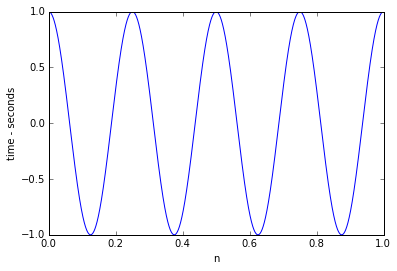

In [17]:
# Input signal
#x = np.array([0,1,2,1,0,-1,-2,-1,0,1,2,1,0,-1,-2,-1])

fs = 44100
T = 1.0/fs
f0 = 4 # Hz
for_one_sec = 1.0
phase_shift = 0 #np.pi/4.0
t_array = np.arange(0,for_one_sec,T)

# Complex
if True:
    x = np.exp(1j * ((2*np.pi * f0 * t_array) + phase_shift)) 
    #x = x[5:] # Shift the phase

# Real
if False:
    x = np.cos((2*np.pi * f0 * t_array) + phase_shift)

N = len(t_array)
plt.plot(t_array, np.real(x))
plt.xlabel("n")
plt.ylabel("time - seconds")
plt.show()

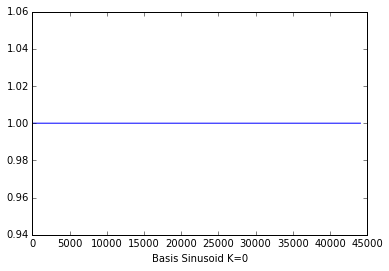

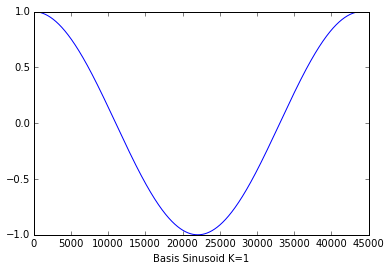

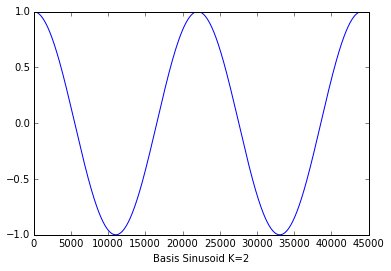

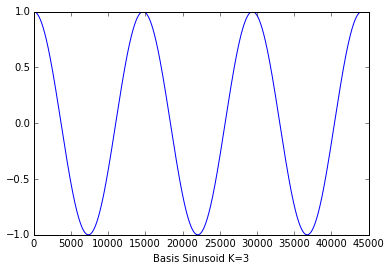

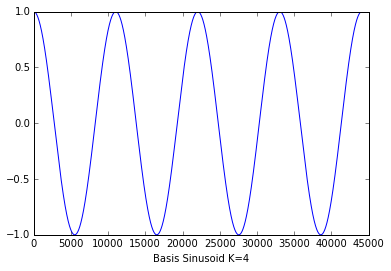

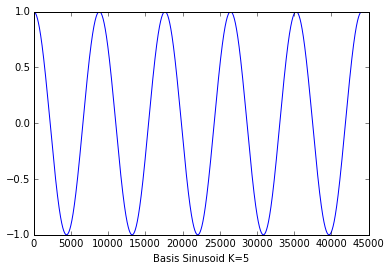

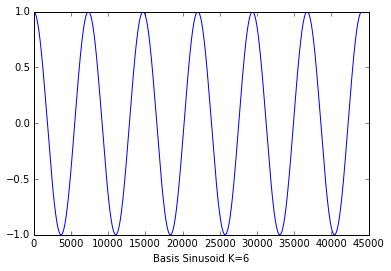

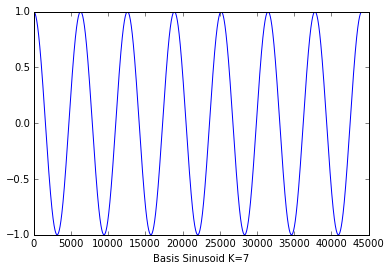

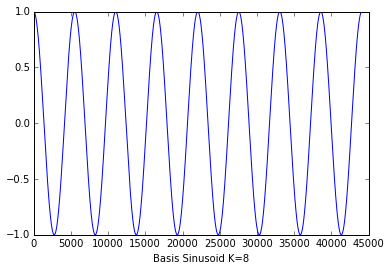

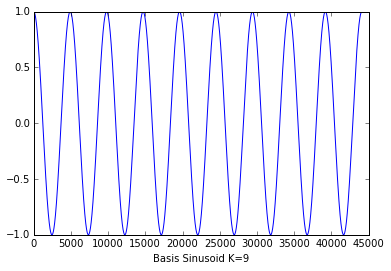

Not showing all the sinusoid basis


In [ ]:
# Basis sinusoids
e = []
for k in range(0,N):
    # e_k is an array since n is an array from 0 to N
    e_k = np.exp(-1 * 1j * 2 * np.pi * k * n/float(N))
    
    if k < 10:
        plt.plot(t_arraynp.real(e_k))
        plt.xlabel("Basis Sinusoid K=" + str(k))
        plt.show()
    elif k == 10:
        print "Not showing all the sinusoid basis"
        
    e.append(e_k)

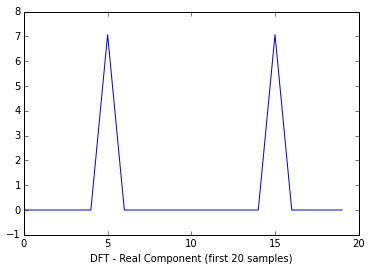

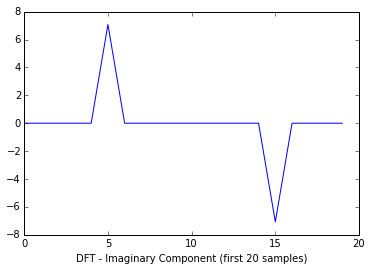

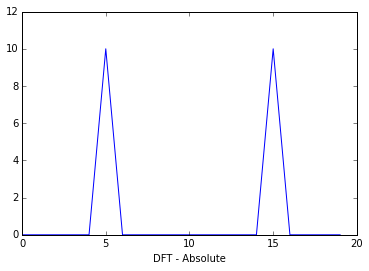

In [39]:
# Then project input signal to each sinusoid and sum
X = []
for k in range(0,N):
    # Parallel multiple then sum
    X_k = np.sum(x * e[k])
    X.append(X_k)
plt.plot(np.real(X[:]))
plt.xlabel("DFT - Real Component (first 20 samples)")
plt.show()

plt.plot(np.imag(X[:]))
plt.xlabel("DFT - Imaginary Component (first 20 samples)")
plt.show()

plt.plot(np.abs(X))
plt.xlabel("DFT - Absolute")
plt.show()

## DFT Equation

The DFT Equation is as follows:

$$\forall k: 0 \rightarrow (N-1) \\
X[k] = \sum_{n=0}^{N-1} x[n] * e^{-j 2 \pi k (\frac{n}{N})}$$

# IDFT

Project back to get original signal

$$\forall n: 0 \rightarrow (N-1) \\
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] * e^{j 2 \pi n (\frac{k}{N})}$$

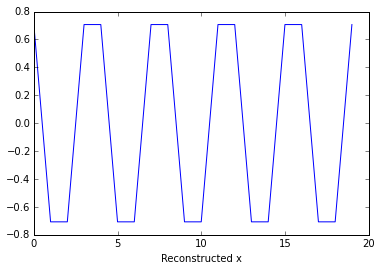

In [40]:
e1 = []
for k in range(0,N):
    # Compute idft basis sinusoids - remember n is array from 0 to N
    e1_k = np.exp(1 * 1j * 2 * np.pi * k * n/float(N))
    e1.append(e1_k)
    
#print e1[0][0:5]
#print X[0:5]
x_0 = []
inv_N = 1.0/N
for nnn in range(0,N):
    # Project DFT onto IDFT basis sinusoid
    x_n = np.sum(X * e1[nnn]) * inv_N
    x_0.append(x_n)
    
plt.plot(np.real(x_0))
plt.xlabel("Reconstructed x")
plt.show()